### BRIa Project - Resting state EEG Analysis 

Author: Juraj Dedic, xdedic07

In [1]:
# from scipy.io import loadmat
import mne
from db import engine, Base, load_recoding
from sqlalchemy.orm import sessionmaker
from tqdm import tqdm_notebook
import numpy as np

Session = sessionmaker(bind=engine)
session = Session()

dict_keys([])


In [13]:
ch_names, data_EC = load_recoding(session, 6, tqdm_notebook)

data_EC = np.array(data_EC)

# print the first 10 values of FP1
print(data_EC[0])
eeg_EC = data_EC * 1e-6 # convert to volts
print(eeg_EC[0])

# create info object
info = mne.create_info(
    ch_names=ch_names,
    ch_types=['eeg']*64, #+ ['eog']*3 + ['misc']*1,
    sfreq=2048)

# create raw object
raw = mne.io.RawArray(eeg_EC, info)



Loading channel data from DB:   0%|          | 0/64 [00:00<?, ?channel/s]

[14128800. 14129800. 14125500. ... 14407900. 14408900. 14404500.]
[14.1288 14.1298 14.1255 ... 14.4079 14.4089 14.4045]
Creating RawArray with float64 data, n_channels=64, n_times=38401
    Range : 0 ... 38400 =      0.000 ...    18.750 secs
Ready.


In [14]:
montage = mne.channels.make_standard_montage('biosemi64')
raw.set_channel_types({'Afz': 'misc'})
raw.set_montage(montage)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_40464\1747477793.py:2: RuntimeWarning: The unit for channel(s) Afz has changed from V to NA.
  raw.set_channel_types({'Afz': 'misc'})


Measurement date,Unknown
Experimenter,Unknown
Participant,Unknown
Digitized points,66 points
Good channels,"63 EEG, 1 misc"
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,2048.00 Hz
Highpass,0.00 Hz
Lowpass,1024.00 Hz


Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 6759 samples (3.300 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 63 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done  63 out of  63 | elapsed:    0.2s finished


Selecting by non-zero PCA components: 63 components
 
Fitting ICA took 51.8s.


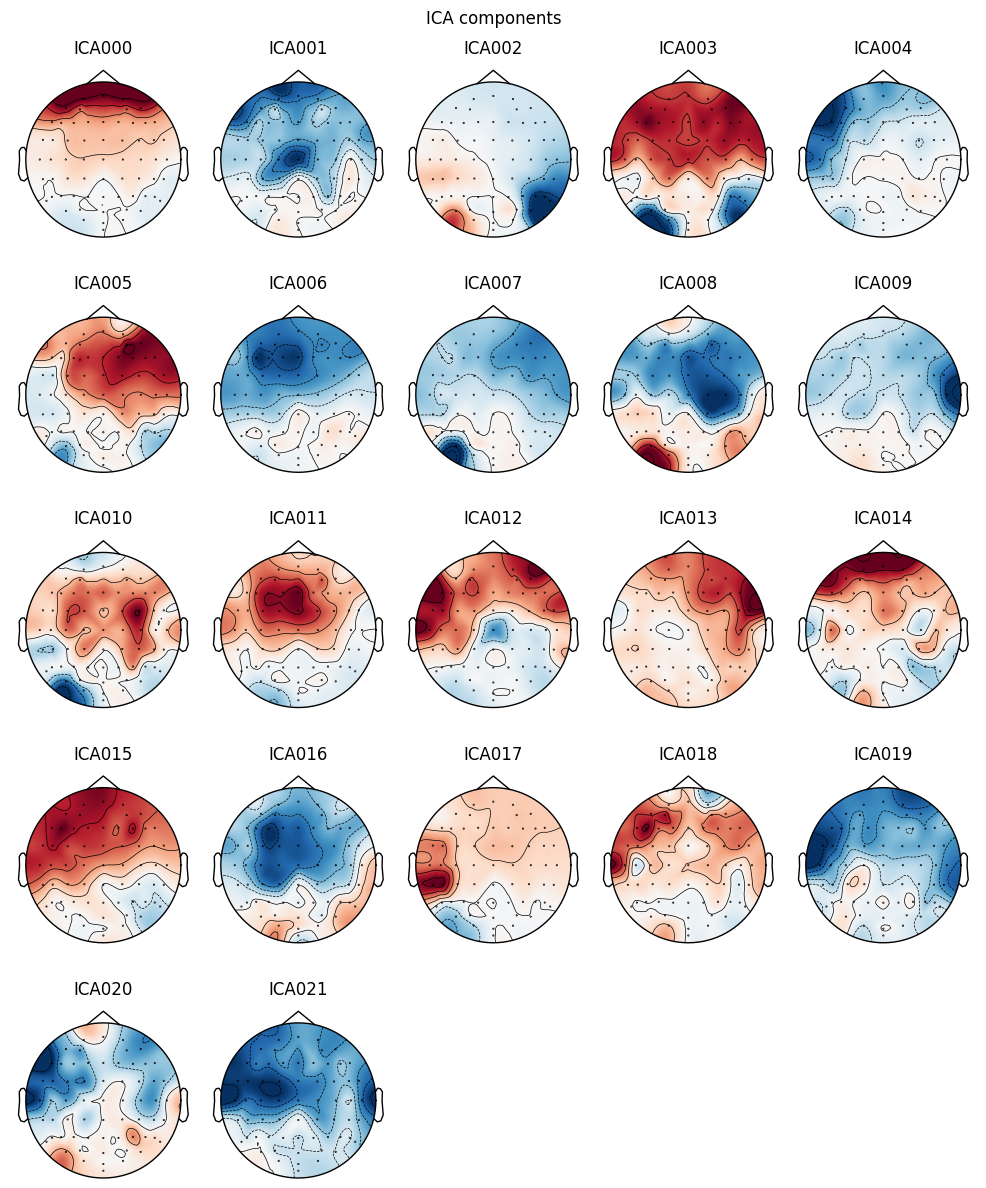

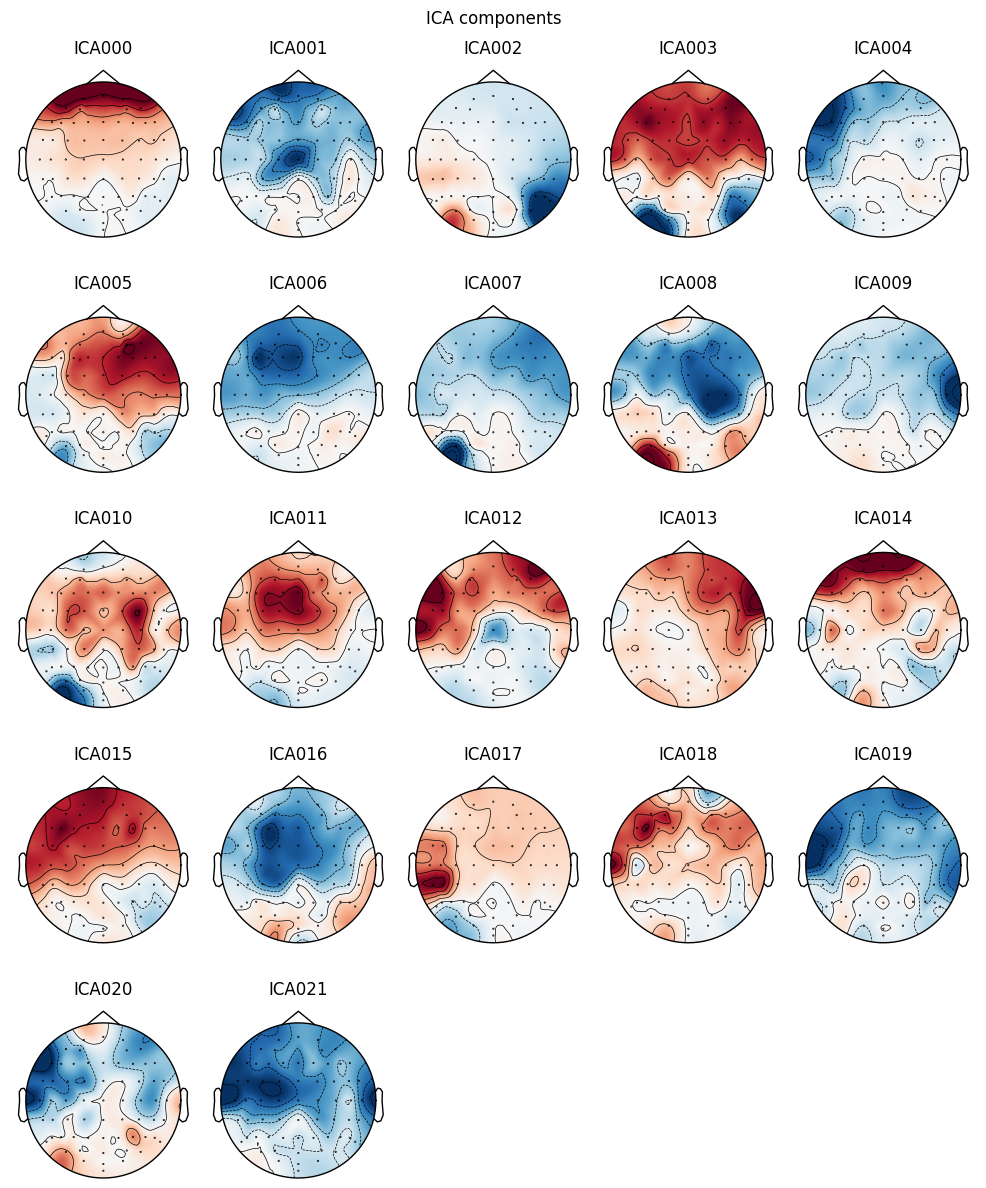

In [15]:
raw_tmp = raw.copy()
raw_tmp.filter(l_freq=1, h_freq=None)
ica = mne.preprocessing.ICA(method="infomax") 
fit_params={"extended": True}
random_state=1
ica.fit(raw_tmp)

ica.plot_components(inst=raw_tmp, picks=range(22));

Applying ICA to Raw instance
    Transforming to ICA space (63 components)
    Zeroing out 1 ICA component
    Projecting back using 63 PCA components


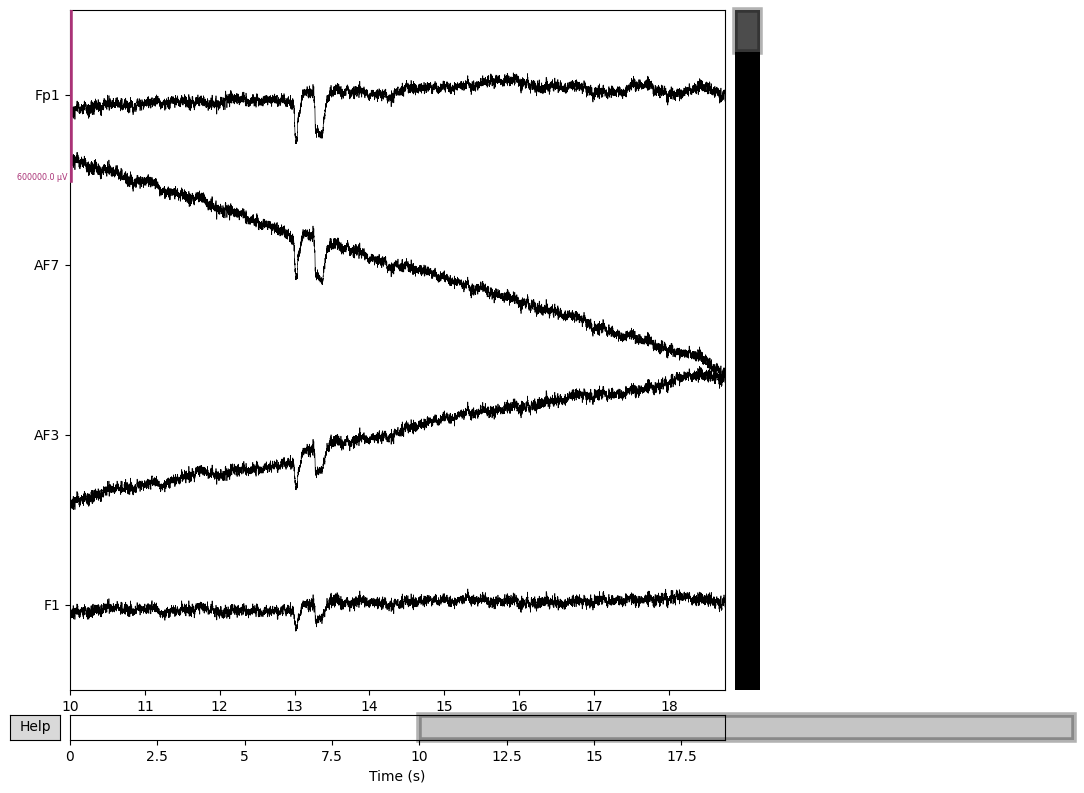

In [17]:
ica.exclude = [1]
raw_corrected = raw.copy()
ica.apply(raw_corrected)
raw_corrected.plot(n_channels=4, start=10, duration=30, title="Before", scalings=dict(eeg=0.3));